*   Mochamad Permana Ash Shidiq
*   1103228233
*   K-Means Clusteting

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# 1. Memuat Data

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/6 Mall Customers - Mochamad Permana Ash Shidiq.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2. Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# 3. Pre-Processing

In [ ]:
# Menjatuhkan (drop) kolom CustomerID
df.drop(columns=['CustomerID'], inplace=True)

# Menampilkan 5 baris pertama setelah menjatuhkan kolom
print(df.head())

    Genre  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40


In [ ]:
# Mengganti nama kolom Genre menjadi Gender
df.rename(columns={'Genre': 'Gender'}, inplace=True)

# Menampilkan 5 baris pertama setelah mengganti nama kolom
print(df.head())

   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40


In [ ]:
# Melakukan one-hot encoding pada kolom 'Gender'
df = pd.get_dummies(df, columns=['Gender'])

# Menampilkan hasil
print(df)

     Age  Annual Income (k$)  Spending Score (1-100)  Gender_Female  \
0     19                  15                      39          False   
1     21                  15                      81          False   
2     20                  16                       6           True   
3     23                  16                      77           True   
4     31                  17                      40           True   
..   ...                 ...                     ...            ...   
195   35                 120                      79           True   
196   45                 126                      28           True   
197   32                 126                      74          False   
198   32                 137                      18          False   
199   30                 137                      83          False   

     Gender_Male  
0           True  
1           True  
2          False  
3          False  
4          False  
..           ...  
195        Fal

# 4. Clustering

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

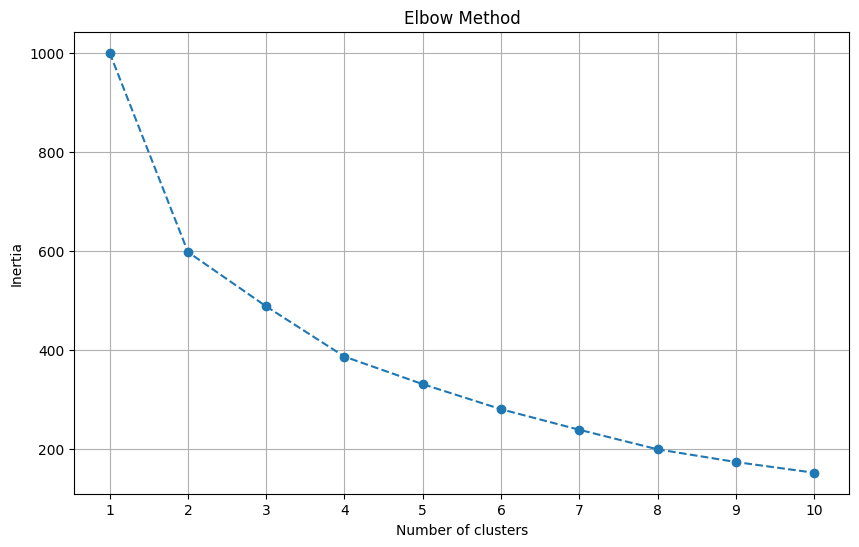

In [ ]:
# Standarisasi fitur-fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Menggunakan Elbow Method untuk menentukan jumlah cluster terbaik
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [ ]:
# Melatih model K-Means dengan 5 cluster
kmeans = KMeans(n_clusters=5)
kmeans.fit(df)

# Menambahkan label cluster ke dalam dataframe
df['Cluster'] = kmeans.labels_

# Menampilkan hasil clustering
print(df)

     Age  Annual Income (k$)  Spending Score (1-100)  Gender_Female  \
0     19                  15                      39          False   
1     21                  15                      81          False   
2     20                  16                       6           True   
3     23                  16                      77           True   
4     31                  17                      40           True   
..   ...                 ...                     ...            ...   
195   35                 120                      79           True   
196   45                 126                      28           True   
197   32                 126                      74          False   
198   32                 137                      18          False   
199   30                 137                      83          False   

     Gender_Male  Cluster  
0           True        4  
1           True        2  
2          False        4  
3          False        2  
4      

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


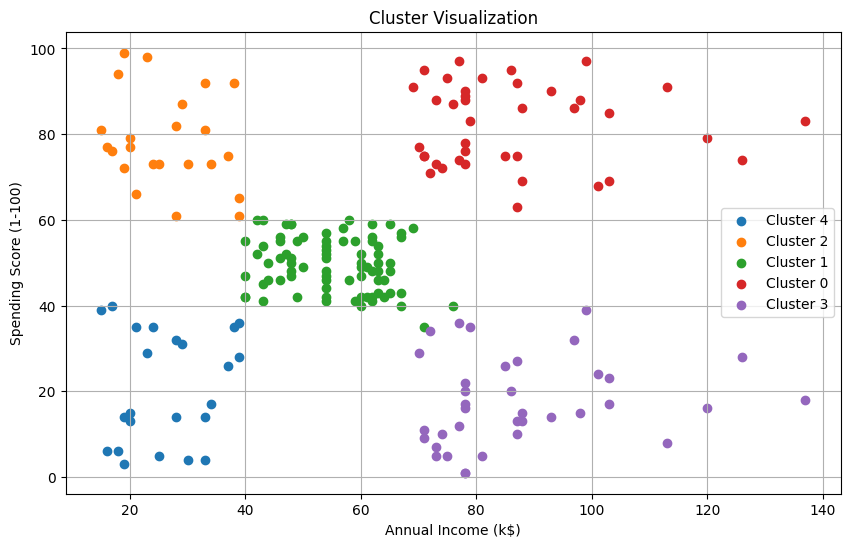

In [ ]:
# Visualisasi hasil cluster
plt.figure(figsize=(10, 6))
for cluster in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], label=f'Cluster {cluster}')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Cluster Visualization')
plt.legend()
plt.grid(True)
plt.show()

# 5. Evaluasi

In [ ]:
# Menghitung Silhouette Score
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg}')

# Menghitung inersia
inertia = kmeans.inertia_
print(f'Inertia: {inertia}')

Silhouette Score: 0.18371457890853427
Inertia: 75448.45165554191
